In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os

In [2]:
# set working directory // place commands in .env
new_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(new_dir)

print('In Predictive Model Folder:', os.getcwd())

In Predictive Model Folder: c:\Users\ashly\OneDrive\Documents\Education Material\ResearchProject\MaternalHealthResearch\predictive-model


Daily Sleep and Activity Analysis

In [3]:
# set the path of the interim data files
interim_data_path = f'{os.getcwd()}/data_interim/'

# dataframe assignments
df_daily_sleep_activity = pd.read_csv(interim_data_path+'daily_sleep_activity.csv')
df_daily_sleep_activity.describe()


,id,total_sleep_records,total_minutes_asleep,total_steps,total_distance_miles,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,8541.140436,5.554479,25.188862,18.038741,216.854722,712.169492,2397.573850
std,2.060360e+09,0.345521,118.344679,4156.926990,3.070382,36.388187,22.403590,87.164687,165.957432,762.886326
min,1.503960e+09,1.000000,58.000000,17.000000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000
25%,3.977334e+09,1.000000,361.000000,5206.000000,3.000000,0.000000,0.000000,158.000000,631.000000,1850.000000
50%,4.702922e+09,1.000000,433.000000,8925.000000,6.000000,9.000000,11.000000,208.000000,717.000000,2220.000000
75%,6.962181e+09,1.000000,490.000000,11393.000000,8.000000,38.000000,27.000000,263.000000,783.000000,2926.000000
max,8.792010e+09,3.000000,796.000000,22770.000000,17.000000,210.000000,143.000000,518.000000,1265.000000,4900.000000


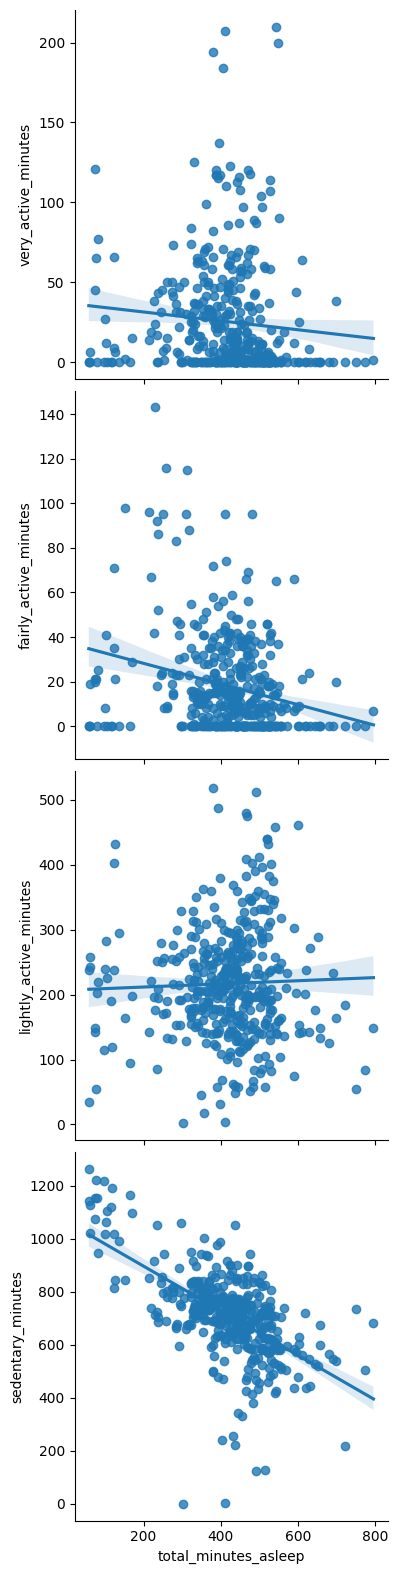

In [4]:
# examine linearity
sns.pairplot(df_daily_sleep_activity, x_vars=['total_minutes_asleep'], y_vars=['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes'], height=4, aspect=1, kind='reg')
plt.show()

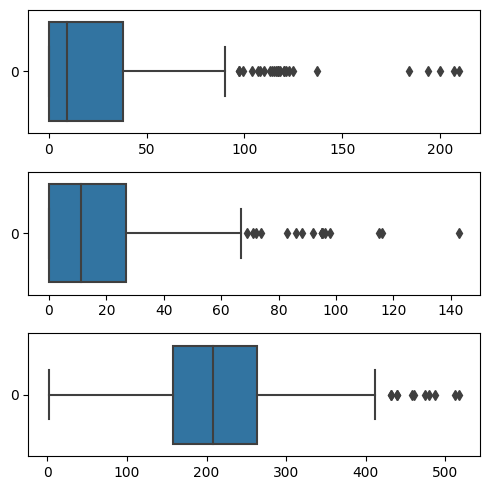

In [5]:
# examine the distribution of each independent variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_daily_sleep_activity['very_active_minutes'], ax = axs[0], orient='h')
plt2 = sns.boxplot(df_daily_sleep_activity['fairly_active_minutes'], ax = axs[1], orient='h')
plt3 = sns.boxplot(df_daily_sleep_activity['lightly_active_minutes'], ax = axs[2], orient='h')
plt.tight_layout()

C:\Users\ashly\AppData\Local\Temp\ipykernel_4960\1631224809.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


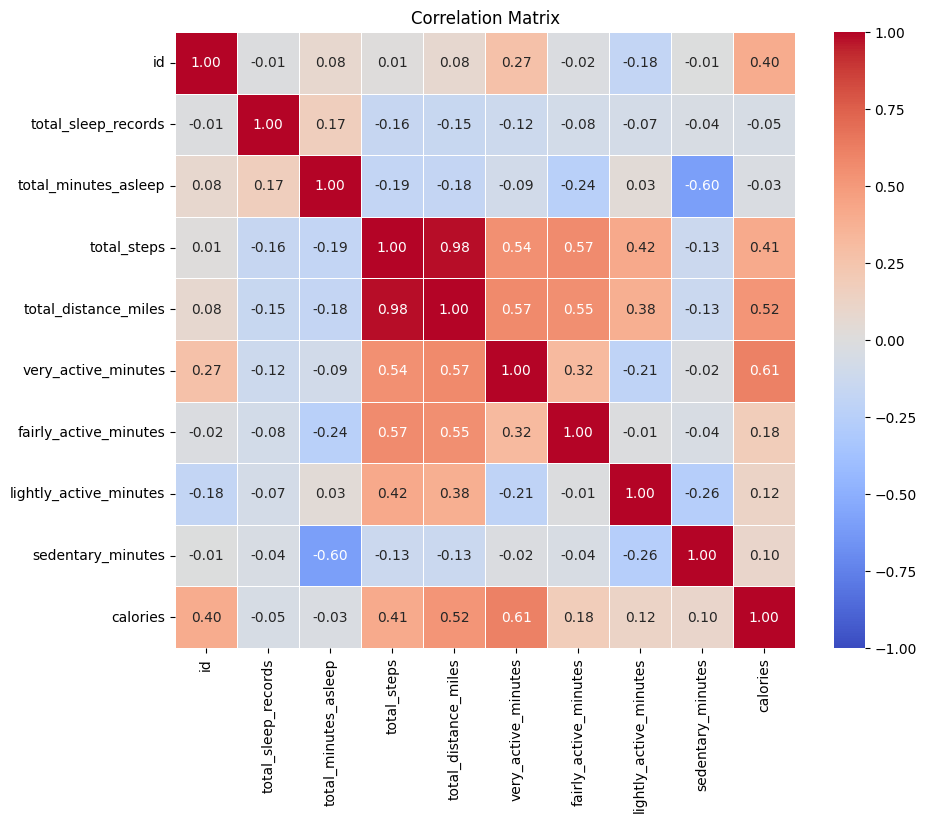

In [12]:
# Compute the correlation matrix
df = df_daily_sleep_activity#.drop(columns=['timestamp']) # temp df for correlation matrix
# print(df.head())
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Durban Watson test -- have to run the regression first!
%pip install statsmodels

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Assuming 'X' and 'y' are your independent and dependent variables, respectively
# Add a constant to X to include an intercept in the model
X = sm.add_constant(df_daily_sleep_activity['total_minutes_asleep'])
y = df_daily_sleep_activity['sedentary_minutes']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Obtain the residuals
residuals = model.resid

# Compute the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw_stat)

Note: you may need to restart the kernel to use updated packages.
Durbin-Watson statistic: 1.7268642603906348


In [15]:
model.params

const                   1064.750153
total_minutes_asleep      -0.840544
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sedentary_minutes   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     230.5
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.22e-41
Time:                        23:44:36   Log-Likelihood:                -2604.7
No. Observations:                 413   AIC:                             5213.
Df Residuals:                     411   BIC:                             5222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1064.7502     24.130     44.126      0.000    1017.317    1112.183
total_minutes_asleep    -0.8405      0.055    -15.181      0.000      -0.949      -0.732
==============================================================================
Omnibus:                      147.646   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.631
Skew:                          -1.424   Prob(JB):                    6.34e-179
Kurtosis:                       9.291   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

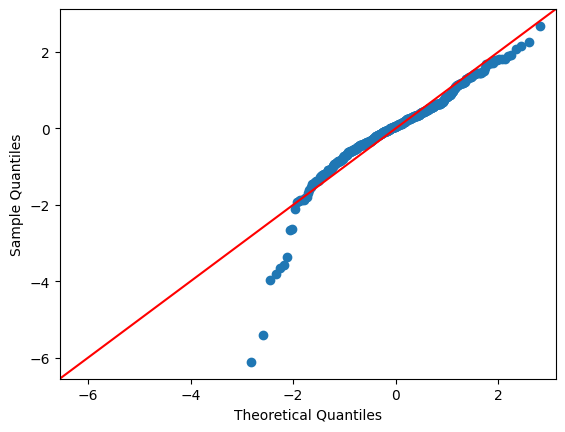

In [17]:
# Check normality of errors
ax = sm.qqplot(residuals, fit = True, line = "45")

Heartrate Mets Merged Dataset Analysis

In [6]:
df_hr_mets_inner = pd.read_csv(interim_data_path+'heartrate_mets_merged_inner.csv')
df_hr_mets_inner.describe()

,id,mets,bpm
count,2.000730e+05,200073.000000,200073.000000
mean,5.416297e+09,18.669870,73.824809
std,1.815188e+09,15.735079,16.795436
min,2.022484e+09,10.000000,38.000000
25%,4.388162e+09,10.000000,62.000000
50%,5.553957e+09,11.000000,70.000000
75%,6.962181e+09,26.000000,83.000000
max,8.877689e+09,144.000000,203.000000


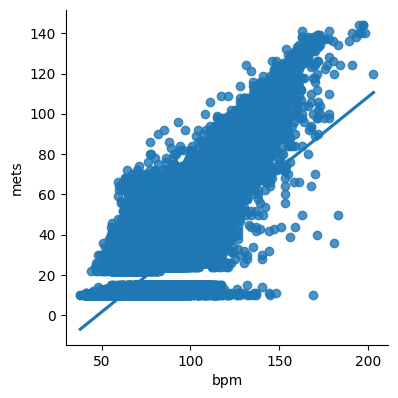

In [7]:
# examine linearity
sns.pairplot(df_hr_mets_inner, x_vars=['bpm'], y_vars=['mets'], height=4, aspect=1, kind='reg')
plt.show()

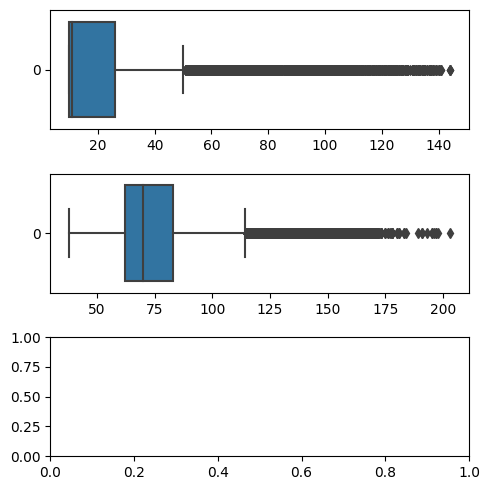

In [18]:
# examine the distribution of each independent variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_hr_mets_inner['mets'], ax = axs[0], orient='h')
plt2 = sns.boxplot(df_hr_mets_inner['bpm'], ax = axs[1], orient='h')
plt.tight_layout()

In [20]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
# Assuming 'X' and 'y' are your independent and dependent variables, respectively
# Add a constant to X to include an intercept in the model
X = sm.add_constant(df_hr_mets_inner['bpm'])
y = df_hr_mets_inner['mets']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Obtain the residuals
residuals = model.resid

# Compute the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 0.5892147781505663


In [21]:
model.params

const   -33.852589
bpm       0.711447
dtype: float64

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mets   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 2.725e+05
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:55:27   Log-Likelihood:            -7.4928e+05
No. Observations:              200073   AIC:                         1.499e+06
Df Residuals:                  200071   BIC:                         1.499e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8526      0.103   -328.102      0.000     -34.055     -33.650
bpm            0.7114      0.001    522.059      0.000       0.709       0.714
==============================================================================
Omnibus:                    28685.567   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77219.841
Skew:                           0.793   Prob(JB):                         0.00
Kurtosis:                       5.598   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""